In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mgwr_coef = pd.read_csv("data/coef_abs_mgwr.csv")

gwr_coef = pd.read_csv("data/coef_abs_gwr.csv")

srf_imp = pd.read_csv("data/Tree_importance.csv")
srf_imp.T
#srf_imp = srf_imp.rename(columns={"high_impact.area":"high_impact/area", "low_impact.area":"low_impact/area"})
mgwr_coef["coef_abs_value"] = mgwr_coef["coef_abs_value"] / mgwr_coef["coef_abs_value"].sum()
gwr_coef["coef_abs_value"] = gwr_coef["coef_abs_value"] / gwr_coef["coef_abs_value"].sum()
srf_imp["importance"] = srf_imp["importance"] / srf_imp["importance"].sum()

srf_imp.at[10,"variable"] = "high_impact/area"
srf_imp.at[11,"variable"] = "low_impact/area"
#srf_imp.at[11,"variable"] = "water"

srf_imp

,variable,importance
0,lot_size,0.203026
1,bathrooms,0.130355
2,sport_facility,0.087800
3,half_bathrooms,0.067293
4,bedrooms,0.057111
5,airport,0.048578
6,subway,0.038253
7,university,0.038074
8,mall,0.036568
9,museum,0.035708


In [15]:
df = mgwr_coef.merge(gwr_coef, how="outer", on="variable").merge(srf_imp, how="outer", on="variable")


def meanret(x1,x2,x3):
    return(np.nanmean((x1,x2,x3)))
df["Mean"] = df.apply(lambda x: meanret(x[1], x[2], x[3]), axis = 1)
df.sort_values("Mean", ascending = True, inplace = True)
df.dropna(subset = ["coef_abs_value_x"], inplace = True)

In [16]:
df["variable"] = df["variable"].apply(lambda x: x.replace("_", " ").capitalize()).apply(lambda x: x.replace("impact/area", "impact crime"))

In [17]:
df.sort_values(by="coef_abs_value_y", ascending=False)

,variable,coef_abs_value_x,coef_abs_value_y,importance,Mean
35,Lot size,0.281818,0.222731,0.203026,0.235858
34,Half bathrooms,0.132037,0.089862,0.067293,0.096397
33,Bathrooms,0.125237,0.082472,0.130355,0.112688
28,Air conditioning,0.030317,0.045734,0.000932,0.025661
30,Is house,0.042086,0.042406,NaN,0.042246
27,Subway,0.028533,0.037278,0.038253,0.034688
22,Furniture,0.017669,0.033254,0.001326,0.017416
32,Industry,0.045670,0.033185,0.012835,0.030563
10,Sport facility,0.003713,0.032463,0.087800,0.041325
31,Bedrooms,0.042743,0.031842,0.057111,0.043899


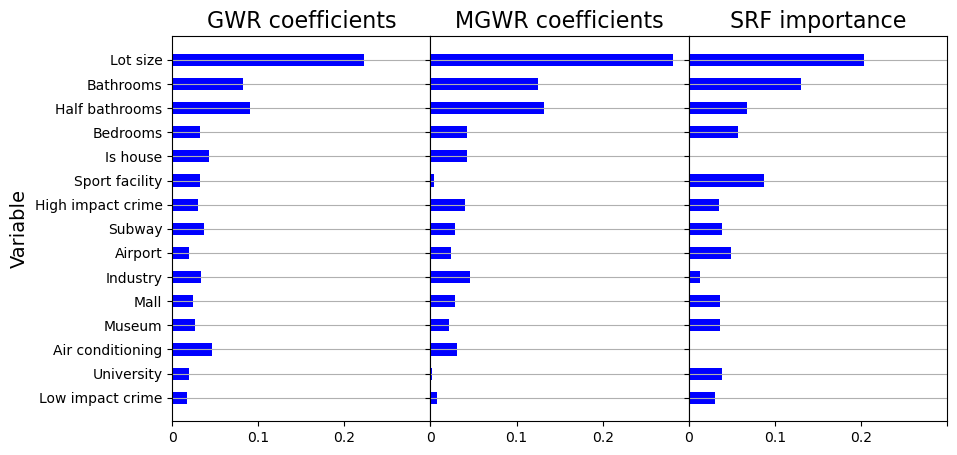

In [18]:
df_plot = df.tail(15)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10,5), sharey=True)
fig.subplots_adjust(wspace=0)
fig.subplots

ax[0].barh(df_plot["variable"], df_plot["coef_abs_value_y"], height=0.5, color='blue', alpha=1, align='center', linewidth=0)
ax[0].set_title("GWR coefficients", fontsize=16)
ax[0].grid(axis = 'y')
#ax[0].set_xlabel("Mean coefficient absolute value", fontsize=14)
ax[0].set_ylabel("Variable", fontsize=14)

ax[1].barh(df_plot["variable"], df_plot["coef_abs_value_x"], height=0.5, color='blue', alpha=1, align='center', linewidth=0)
ax[1].set_title("MGWR coefficients", fontsize=16)
ax[1].grid(axis = 'y')
#ax[1].set_xlabel("Mean coefficient absolute value", fontsize=14)
#ax[1].set_ylabel("Variable", fontsize=14)

ax[2].barh(df_plot["variable"], df_plot["importance"], height=.5, color='blue', alpha=1, align='center', linewidth=0)
ax[2].set_title("SRF importance", fontsize=16)
ax[2].grid(axis = 'y')
#ax[2].set_xlabel("Mean coefficient absolute value", fontsize=14)
#ax[2].set_ylabel("Variable", fontsize=14)
ax[0].set_xticks([0, .1, .2, .3], [0, .1, .2,''])
ax[1].set_xticks([0, .1, .2, .3], [0, .1, .2,''])
ax[2].set_xticks([0, .1, .2, .3], [0, .1, .2,''])
#plt.tight_layout()
plt.savefig("compare.png")
plt.show()


['Low impact crime', 'University', 'Air conditioning', 'Museum', 'Mall', 'Industry', 'Airport', 'Subway', 'High impact crime', 'Sport facility', 'Is house', 'Bedrooms', 'Half bathrooms', 'Bathrooms', 'Lot size']
[[0.018503284655844672, 0.02012040686131214, 0.02566093939641206, 0.02802986858495689, 0.029611304628399476, 0.03056311297919893, 0.030737715923459863, 0.03468822292150392, 0.03514535498407626, 0.041325271800039094, 0.04224605606023204, 0.04389879959727089, 0.09639717517693032, 0.11268820710687588, 0.235858318381708]]


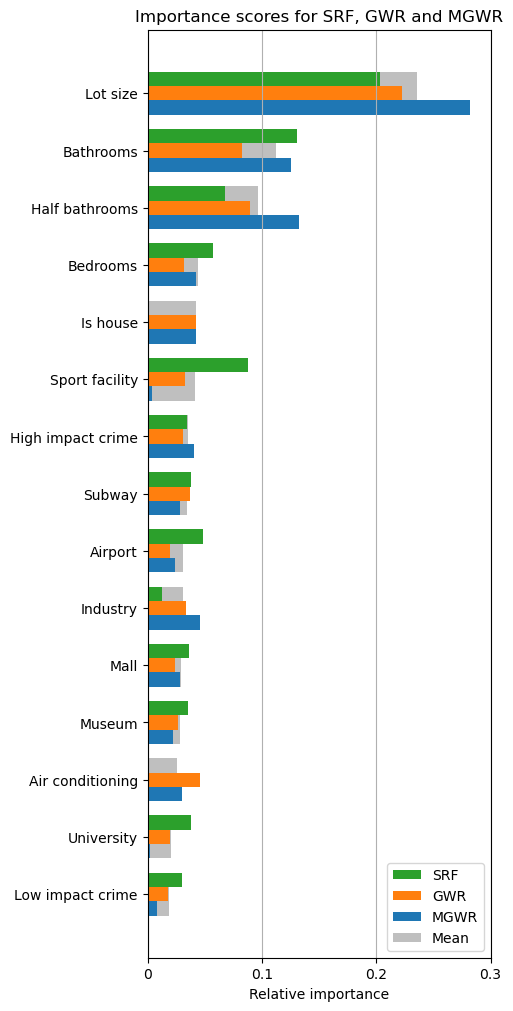

In [19]:
species = df_plot["variable"].to_list()
print(species)
# species = ("Adelie", "Chinstrap", "Gentoo")

penguin_means = (df_plot.drop(columns=['variable', 'Mean']).rename(columns={"coef_abs_value_x":"MGWR", "coef_abs_value_y":"GWR", "importance":"SRF"}).to_dict(orient='list'))
means = (df_plot.drop(columns=['coef_abs_value_x', 'coef_abs_value_y', 'variable', 'importance']).to_dict(orient='list'))
print(list(means.values()))
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50),
#     'Flipper Length': (189.95, 195.82, 217.19),
# }

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(5,10), layout='constrained')
ax.barh(x + width, list(means.values())[0], height=3*width, label = "Mean", color = "gray", alpha = 0.5, ec = None)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.barh(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Relative importance')
ax.set_title('Importance scores for SRF, GWR and MGWR')
ax.set_yticks(x + width, species)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='lower right', ncols=1)
#ax.legend(loc='lower right', ncols=1, reverse = True)
ax.grid(axis='x')
ax.set_xticks([0,.1, .2, .3], [0,.1,.2,.3])
plt.savefig("compare2.png")
plt.show()

['Lot size', 'Bathrooms', 'Half bathrooms', 'Bedrooms', 'Is house', 'Sport facility', 'High impact crime', 'Subway', 'Airport', 'Industry', 'Mall', 'Museum', 'Air conditioning', 'University', 'Low impact crime']
[[0.235858318381708, 0.11268820710687588, 0.09639717517693032, 0.04389879959727089, 0.04224605606023204, 0.041325271800039094, 0.03514535498407626, 0.03468822292150392, 0.030737715923459863, 0.03056311297919893, 0.029611304628399476, 0.02802986858495689, 0.02566093939641206, 0.02012040686131214, 0.018503284655844672]]


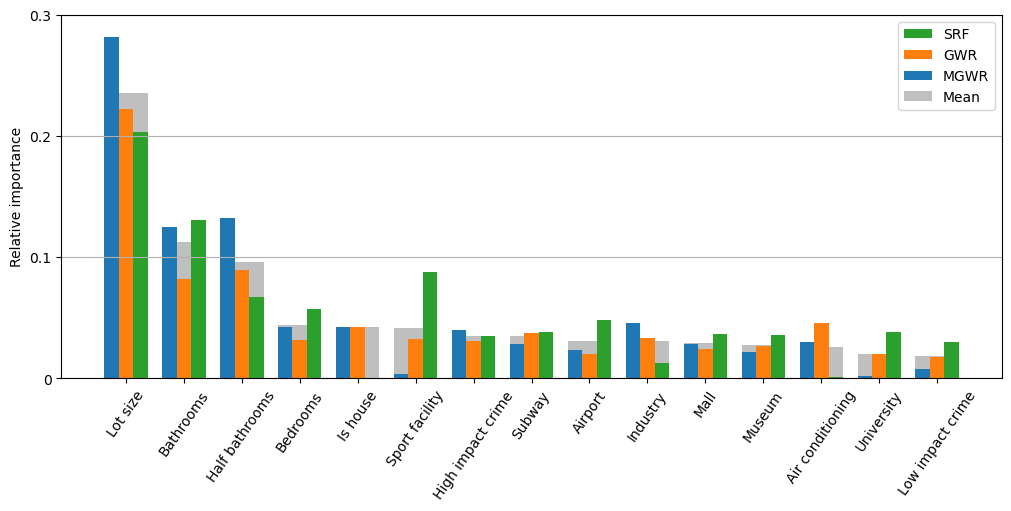

In [20]:
df_plot2 = df_plot.sort_values(by="Mean", ascending=False).copy()
species = df_plot2["variable"].to_list()
print(species)
# species = ("Adelie", "Chinstrap", "Gentoo")

penguin_means = (df_plot2.drop(columns=['variable', 'Mean']).rename(columns={"coef_abs_value_x":"MGWR", "coef_abs_value_y":"GWR", "importance":"SRF"}).to_dict(orient='list'))
means = (df_plot2.drop(columns=['coef_abs_value_x', 'coef_abs_value_y', 'variable', 'importance']).to_dict(orient='list'))
print(list(means.values()))
# penguin_means = {
#     'Bill Depth': (18.35, 18.43, 14.98),
#     'Bill Length': (38.79, 48.83, 47.50),
#     'Flipper Length': (189.95, 195.82, 217.19),
# }

x = np.arange(len(species))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(10,5), layout='constrained')
for attribute, measurement in means.items():
    ax.bar(x + width, measurement, 3*width, label=attribute, color = "gray", alpha = 0.5, ec = None)


#ax.bar(x + width, list(means.values())[0], width, label = "Mean", color = "gray", alpha = 0.5, ec = None)

for attribute, measurement in penguin_means.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    #ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Relative importance')
#ax.set_title('Importance scores for SRF, GWR and MGWR')
ax.set_xticks(x + width, species)
ax.tick_params(axis='x', rotation=55)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1],loc='upper right', ncols=1)
#ax.legend(loc='lower right', ncols=1, reverse = True)
ax.grid(axis='y')
ax.set_yticks([0,.1, .2, .3], [0,.1,.2,.3])
plt.savefig("compare2H.png")
plt.show()


df_plot2.drop(columns=['Mean']).to_csv("canva.csv", index=False)